# Part 1
## GOAL 


#### Why do I want find the fish in an image ? 
As we know, we want to classify the images in 8 clusters of fish. But before to classify all the image, it is necessary to clean the image. We can use some filter, or use some template. 

This notebook uses the package opencv, and more precisly the mehod of Template Matching. 

For my code, I use this [*tutorial*](http://docs.opencv.org/3.1.0/d4/dc6/tutorial_py_template_matching.html)

In [5]:
import imread
import os 
from scipy import ndimage
from subprocess import check_output

import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

This method need to have a template. 
Lets go create the template. 

###### *Remark* : 

In all this part, we focus on LAG fish (so we create only one LAG template)

(<matplotlib.axes._subplots.AxesSubplot at 0x11e1c16d0>,
 <matplotlib.image.AxesImage at 0x11e807250>)

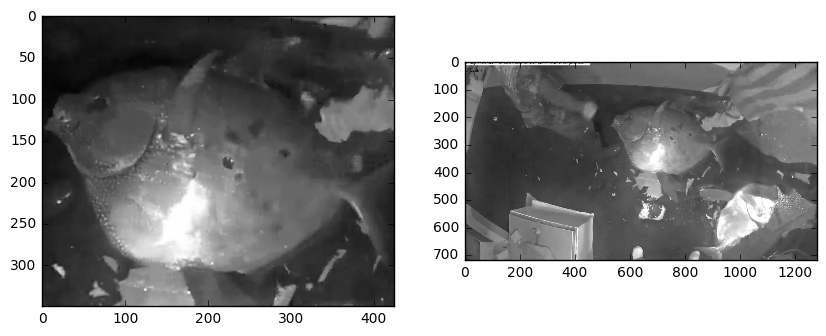

In [75]:
img_rows, img_cols= 350, 425
im_array = cv2.imread('/Users/HUGO/Documents/Kaggle/FISH/train/LAG/img_00091.jpg',0)
template = np.zeros([ img_rows, img_cols], dtype='uint8') # initialisation of the template
template[:, :] = im_array[100:450,525:950] # I try multiple times to find the correct rectangle. 
#template /= 255.
plt.subplots(figsize=(10, 7))
plt.subplot(121),plt.imshow(template, cmap='gray') 
plt.subplot(122), plt.imshow(im_array, cmap='gray')

#### Use the technique Template Matching with 6 methods, and compare each other 

I choose an random image to test the 6 methods. 

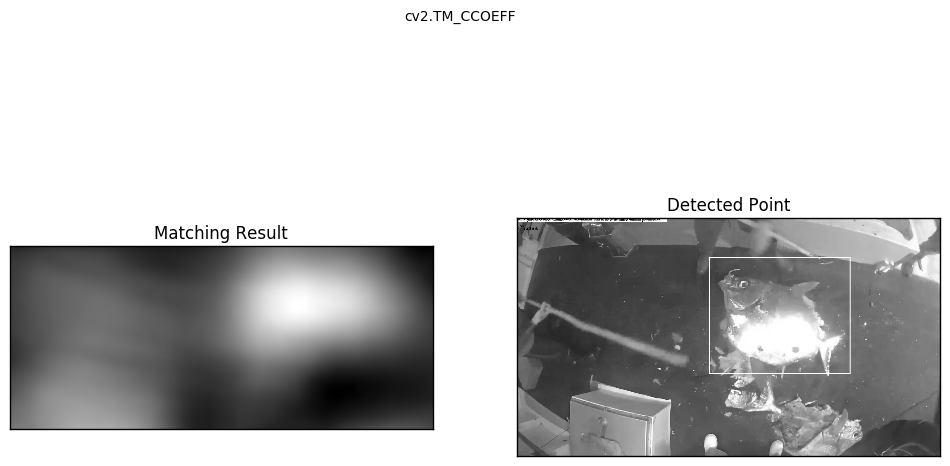

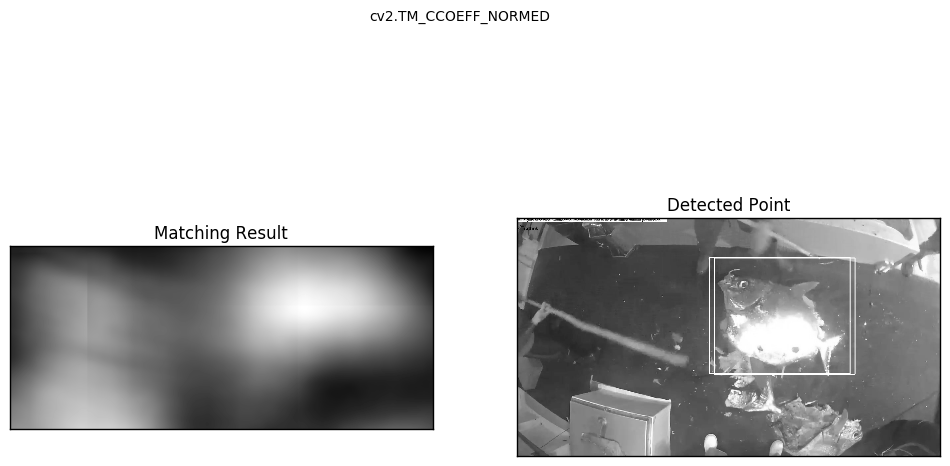

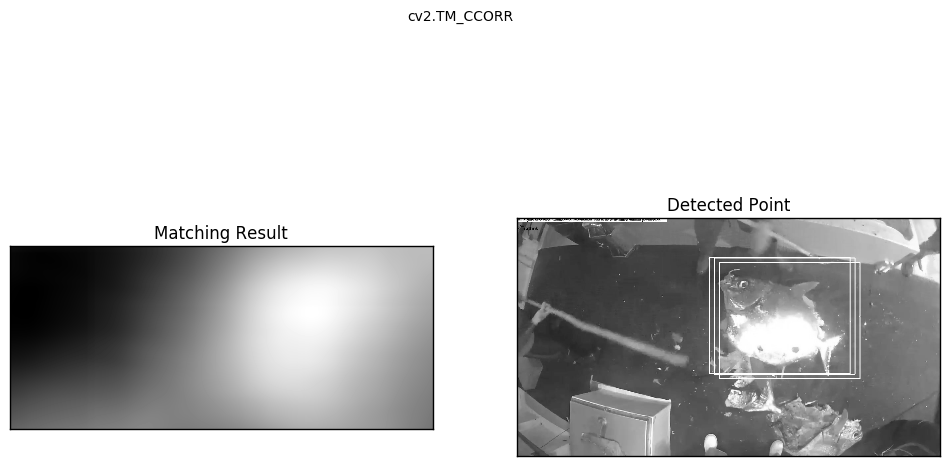

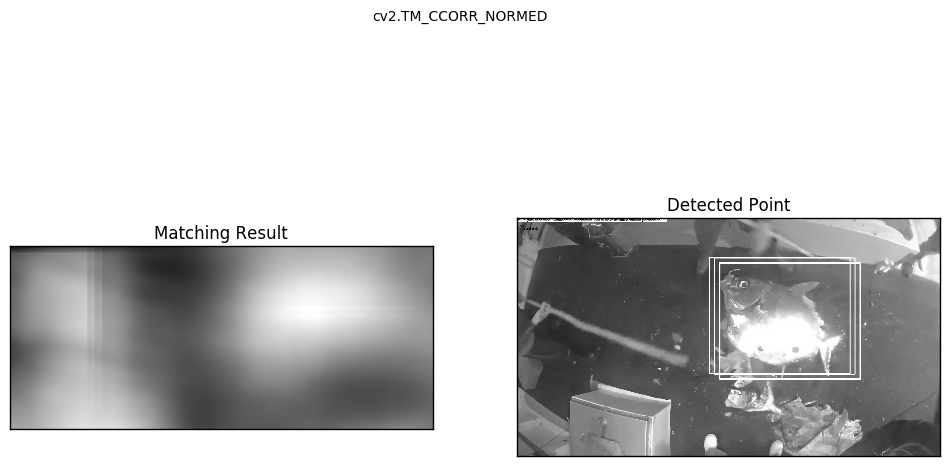

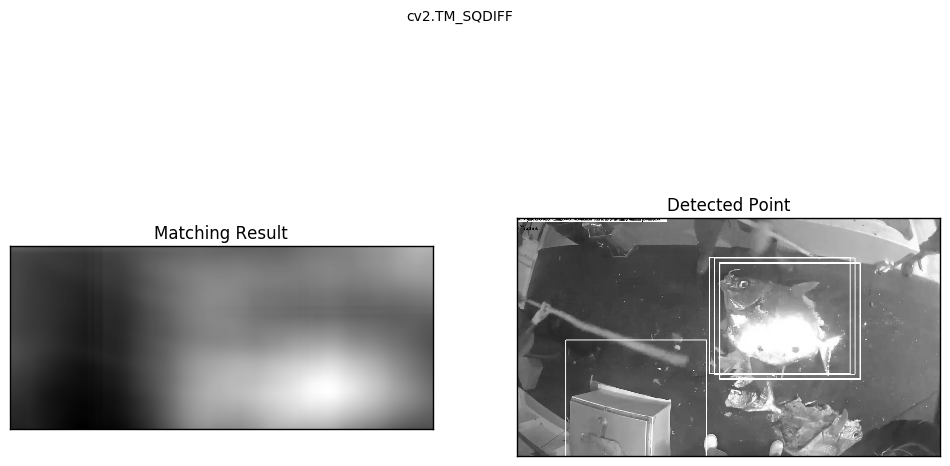

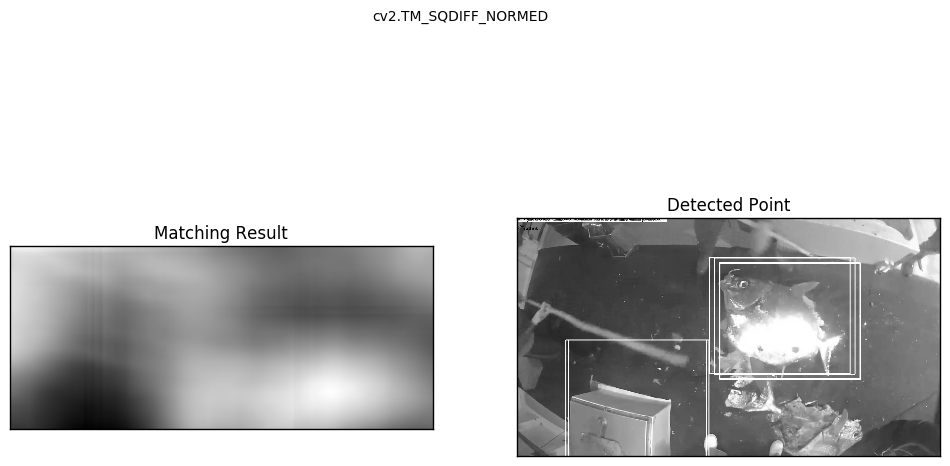

In [76]:
os.chdir('/Users/HUGO/Documents/Kaggle/FISH/train/LAG')
file_name = 'img_01512.jpg' # img_00176,img_02758, img_01512
img = cv2.imread(file_name,0) 
img2 = img
w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
     img = img2
     method = eval(meth)
 
     # Apply template Matching
     res = cv2.matchTemplate(img,template,method)
     min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
 
     # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
     if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
         top_left = min_loc
     else:
         top_left = max_loc
     bottom_right = (top_left[0] + w, top_left[1] + h)
 
     cv2.rectangle(img,top_left, bottom_right, 255, 2)
     fig, ax = plt.subplots(figsize=(12, 7))
     plt.subplot(121),plt.imshow(res,cmap = 'gray')
     plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
     plt.subplot(122),plt.imshow(img,cmap = 'gray') #,aspect='auto'
     plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
     plt.suptitle(meth)
 
     plt.show()

## Remark : 

All of them (methods) detect the template in the image. Sometime, we can detect some other part in the image. 

I choose the cv2.TM_CCOEFF method. 
Now, let's try with mutliple image and different type of fish. 

Below, we can find 4 images of each group of fish with the rectangle that is found by the template matching method. 

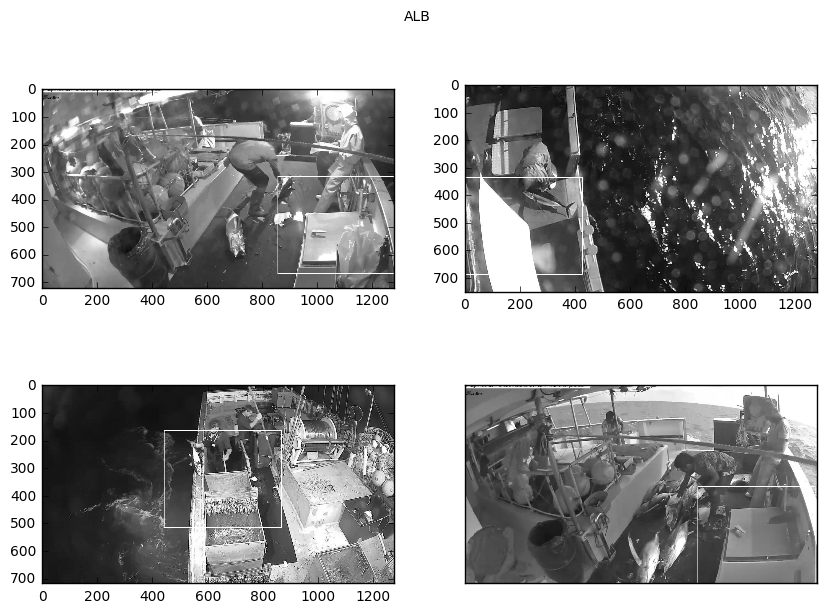

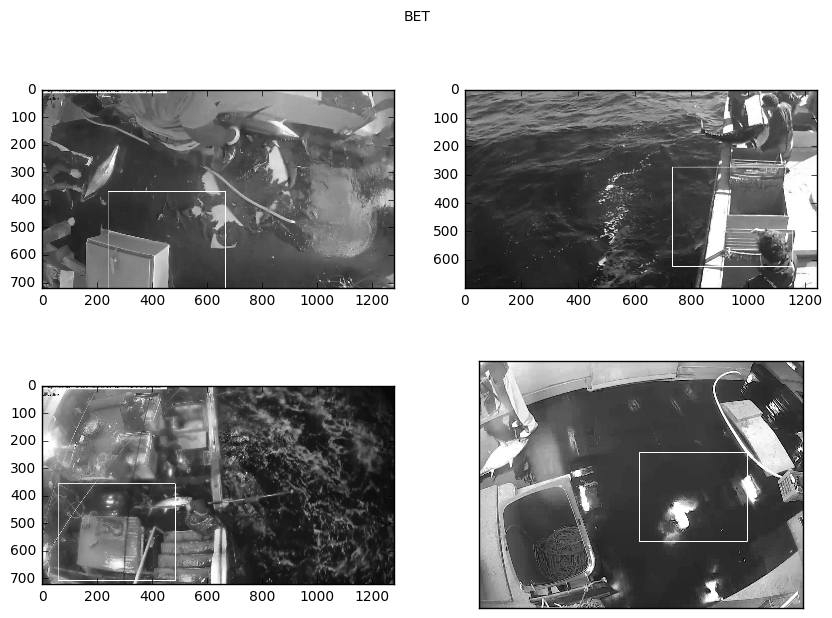

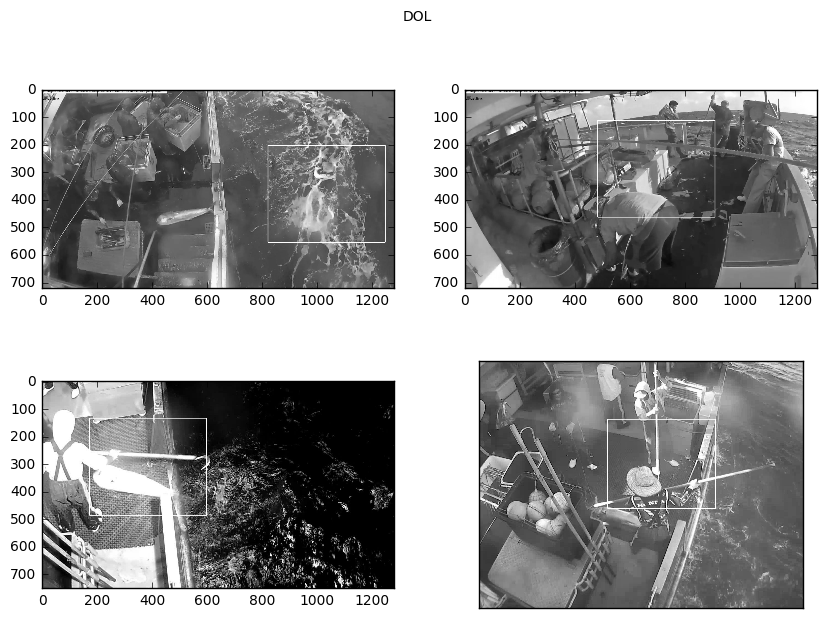

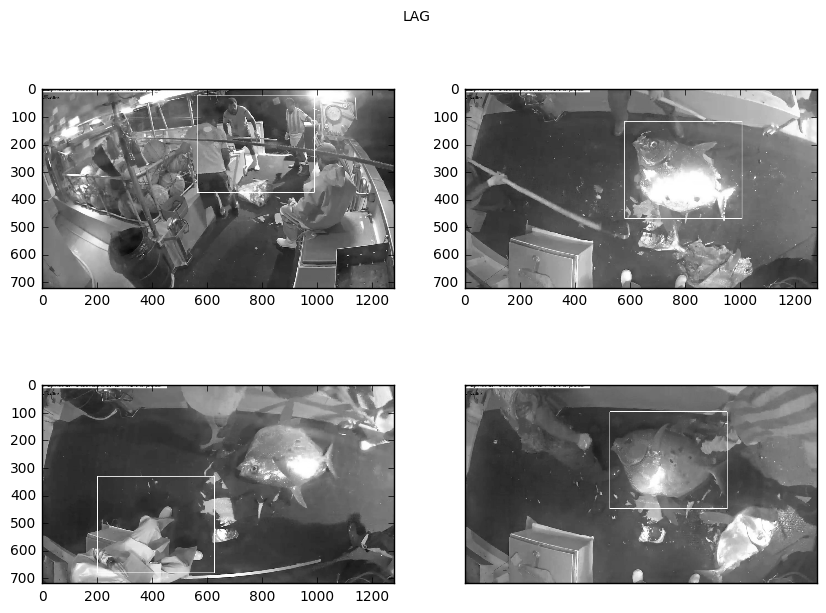

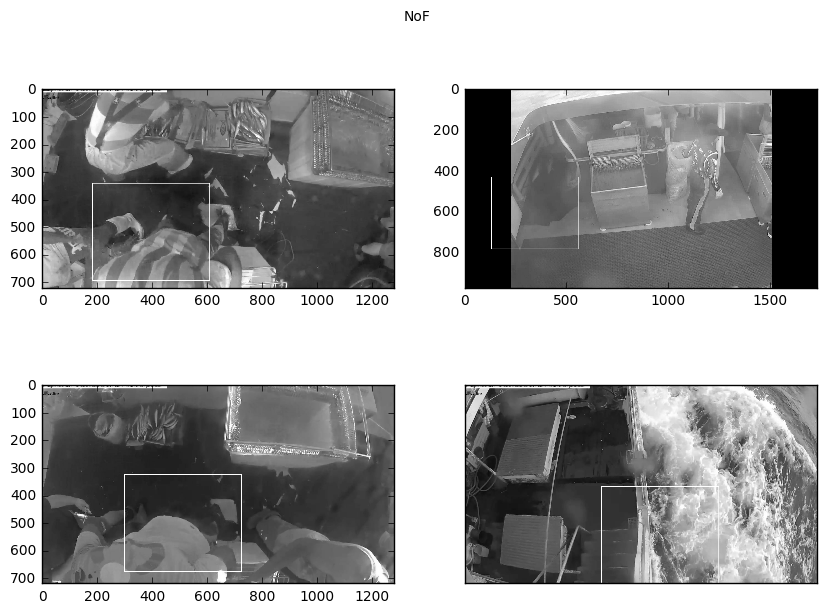

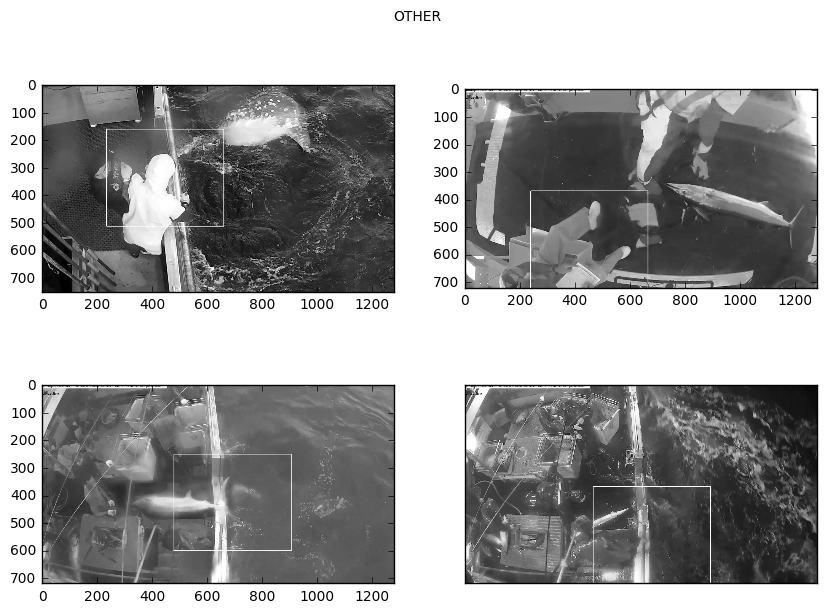

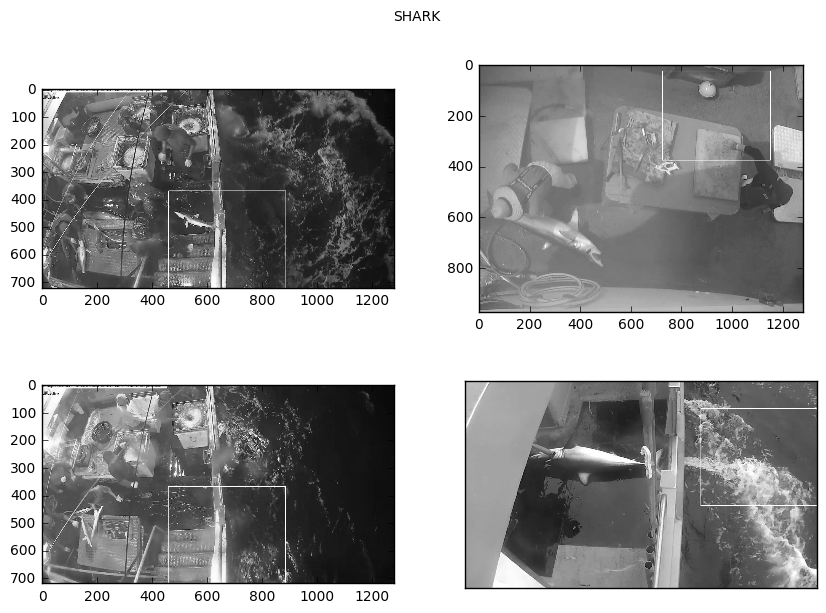

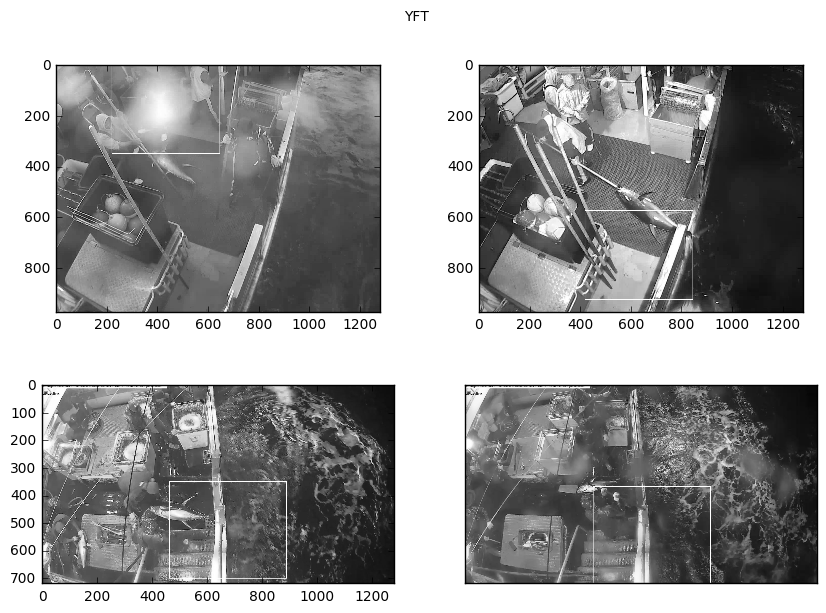

In [84]:
os.chdir('/Users/HUGO/Documents/Kaggle/FISH/train/')
method = eval('cv2.TM_CCOEFF')
indexes=[1,30,40,5]

train_path = "../train/"
sub_folders = check_output(["ls", train_path]).decode("utf8").strip().split('\n')
for sub_folder in sub_folders:
    file_names = check_output(["ls", train_path+sub_folder]).decode("utf8").strip().split('\n')
    k=0
    _, ax = plt.subplots(2,2,figsize=(10, 7))
    for file_name in [file_names[x] for x in indexes]: # I take only 4 images of each group. 
        img = cv2.imread(train_path+sub_folder+"/"+file_name,0)
        img2 = img
        w, h = template.shape[::-1]
        # Apply template Matching
        res = cv2.matchTemplate(img,template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
 
        cv2.rectangle(img,top_left, bottom_right, 255, 2)
        if k==0 : 
            ax[0,0].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        if k==1 : 
            ax[0,1].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        if k==2 : 
            ax[1,0].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        if k==3 : 
            ax[1,1].imshow(img,cmap = 'gray')
            plt.xticks([]), plt.yticks([])
        k=k+1
    plt.suptitle(sub_folder)
    plt.show()


### Remark :
As we can see, with a LAG template, we almost find all the LAG fish. This is good point. 
The other good point is that we don't find in our rectangle the other fish. Now the idea is to create the other template and do it for all the images. 


# Part 2

### Soon.... 


On the same way, the goal is to detect the fish in an image. 

There exist a method to find Shapes in an image. ([*tutorial*](http://www.pyimagesearch.com/2014/10/20/finding-shapes-images-using-python-opencv/))

In [85]:
# import the necessary packages
import numpy as np
import argparse
import cv2

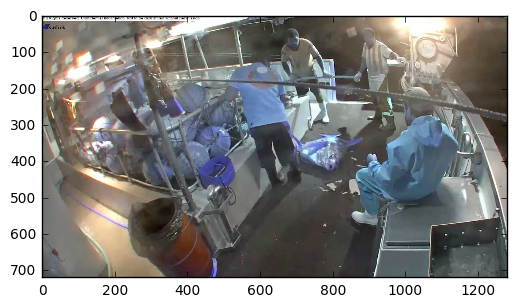

In [86]:
# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image", help = "/Users/HUGO/Documents/Kaggle/FISH/train/LAG/img_01527.jpg")
#args = vars(ap.parse_args())

# load the image
image = cv2.imread('/Users/HUGO/Documents/Kaggle/FISH/train/LAG/img_01527.jpg')
plt.imshow(image)

In [87]:
# find all the 'black' shapes in the image
lower = np.array([0, 0, 0]) # ([17, 15, 100], [50, 56, 200]) blue
upper = np.array([40,50,200]) # [0,140,255], [0,165,255] orange
shapeMask = cv2.inRange(image, lower, upper)

In [ ]:
# DO NOT COMPILE 



# define the list of boundaries
boundaries = [
	([17, 15, 100], [50, 56, 200]),
	([86, 31, 4], [220, 88, 50]),
	([25, 146, 190], [62, 174, 250]),
	([103, 86, 65], [145, 133, 128])
]

# loop over the boundaries
for (lower, upper) in boundaries:
	# create NumPy arrays from the boundaries
	lower = np.array(lower, dtype = "uint8")
	upper = np.array(upper, dtype = "uint8")
 
	# find the colors within the specified boundaries and apply
	# the mask
	mask = cv2.inRange(image, lower, upper)
	output = cv2.bitwise_and(image, image, mask = mask)
 
	# show the images
	cv2.imshow("images", np.hstack([image, output]))
	cv2.waitKey(0)

In [ ]:
plt.imshow(shapeMask,cmap='hot')